In [1]:
import wandb

wandb_api = '7dcd5187be3f8ff229709dd8513e7a13624e5405'
wandb.login(key=wandb_api)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: lesythang1581994 (lesythang). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\ADMIN\.netrc


True

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
#Bài tập

#Khởi tạo dataset

df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [30]:
print(df)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [31]:
def predict_bt(x1, x2, x3, w1, w2, w3, b):
    return x1*w1 + x2*w2 + x3*w3 + b

In [32]:
#Tính đạo hàm
def gradient_bt (y_hat , y, x1, x2, x3):
    dw1 = 2 * x1 * ( y_hat -y)
    dw2 = 2 * x2 * ( y_hat -y)
    dw3 = 2 * x3 * ( y_hat -y)
    db = 2 * ( y_hat -y)

    return (dw1, dw2, dw3 , db)

In [33]:
#Update giá trị trọng số

def update_weight_bt (w1, w2, w3, b, lr , dw1, dw2, dw3 , db):
    w1_new = w1 - lr * dw1
    w2_new = w2 - lr * dw2
    w3_new = w3 - lr * dw3
    b_new = b - lr * db

    return (w1_new, w2_new, w3_new , b_new )

In [34]:
# Khi tính đạo hàm con số rất lớn nên cần scale dữ liệu lại.
# Normalized data
def scaling(data1, data2, data3):
    data = data1 + data2 + data3
    max_value = max(data)
    min_value = min(data)
    mean_value = sum(data) / len(data)

    data1 = [(x - mean_value) / (max_value - min_value) for x in data1]
    data2 = [(x - mean_value) / (max_value - min_value) for x in data2]
    data3 = [(x - mean_value) / (max_value - min_value) for x in data3]
    return (data1, data2, data3)

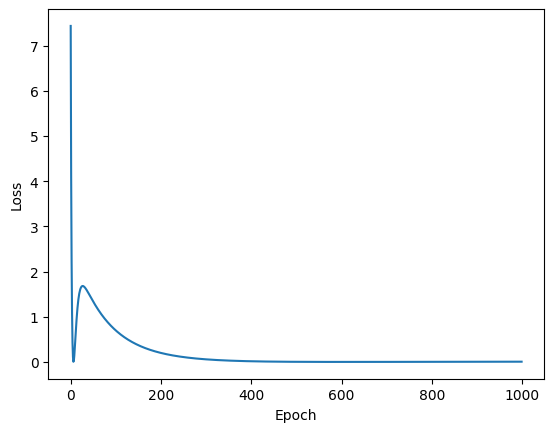

In [41]:
# init weights
b = 1
w1,w2,w3 = 0,0,0
lr = 0.01
epochs = 1000

(X1_train,X2_train,X3_train) = scaling(df['TV'],df['Radio'],df['Newspaper'])
Y_train = df['Sales']

N = len(X1_train)
# parameter
losses = [] # for debug


for epoch in range ( epochs ):
    # for an epoch
    
    for i in range (N):
        # get a sample
        x1 = X1_train[i]
        x2 = X2_train[i]
        x3 = X3_train[i]
        y = Y_train [i]

        y_hat = predict_bt (x1, x2, x3, w1, w2, w3, b)

        # compute loss
        loss = (y_hat -y)*( y_hat -y)
        
        (dw1, dw2, dw3 , db) = gradient_bt (y_hat , y, x1, x2, x3)

        # update weights
        (w1, w2, w3, b) = update_weight_bt (w1, w2, w3, b, lr , dw1, dw2, dw3, db)
    losses.append(loss)

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

loss,█▃▂▅▃▁▂▁▁▄▁▂▁▂▂▄▂▃▁▅▁▁▁▁▁▄▁▃▁▅▁▁▃▁▁▃▁▃▁▅
loss,0.00518


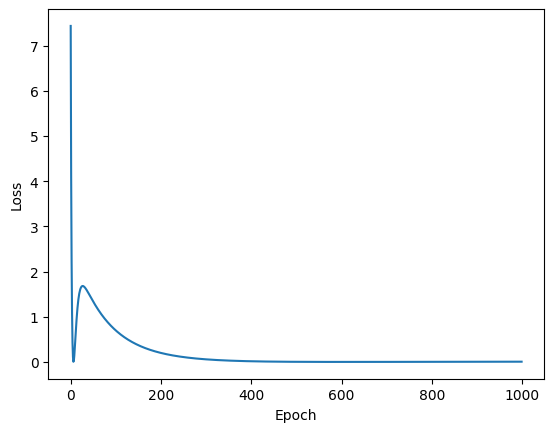

In [47]:
# init weights
b = 1
w1,w2,w3 = 0,0,0
lr = 0.01
epochs = 1000

# init project wandb
wandb . init (
# Set the project where this run will be logged
project ="demo - linear - regression - Exercise",
config ={
"learning_rate": lr ,
"epochs": epochs ,
},)

wandb.run.log ({"Dataset": wandb.Table(dataframe =df)})
data1=df['TV']
data2=df['Radio']
data3=df['Newspaper']
(X1_train,X2_train,X3_train) = scaling(data1,data2,data3)
Y_train = df['Sales']


N = len(X1_train)
# parameter
losses = [] # for debug


for epoch in range ( epochs ):
    # for an epoch
    for i in range (N):
        # get a sample
        x1 = X1_train[i]
        x2 = X2_train[i]
        x3 = X3_train[i]
        y = Y_train [i]

        # predict y_hat
        y_hat = predict_bt (x1, x2, x3, w1, w2, w3, b)

        # compute loss
        loss = (y_hat - y) * ( y_hat - y)

        # tracking loss with WandB
        wandb .log ({" loss ": loss })

        # compute gradient
        (dw1, dw2, dw3 , db) = gradient_bt (y_hat , y, x1, x2, x3)

        # update weights
        (w1, w2, w3, b) = update_weight_bt (w1, w2, w3, b, lr , dw1, dw2, dw3, db)
    losses.append(loss)
    # Mark a run as finished , and finish uploading all data .
wandb.finish ()
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()